In [3]:
# import library
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

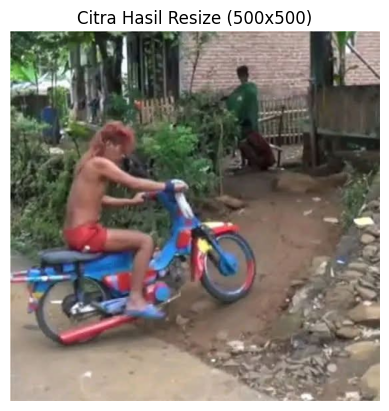

In [8]:
 # Buka gambar
img = Image.open('gus_akira.jpg')

# Ubah ukuran gambar menjadi 500x500
img = img.resize((500, 500))

# Konversi ke mode RGB
img = img.convert("RGB")

plt.imshow(img)
plt.title("Citra Hasil Resize (500x500)")
plt.axis("off")
plt.show()

In [9]:
# Ekstraksi nilai pixel
pixel_data = np.array(img)  # Konversi gambar ke array numpy

# Simpan ke file TXT
output_file = "pixel_data.txt"
with open(output_file, "w") as f:
    for y in range(pixel_data.shape[0]):  # Loop baris (y)
        for x in range(pixel_data.shape[1]):  # Loop kolom (x)
            r, g, b = pixel_data[y, x]
            f.write(f"pixel({x+1},{y+1}) = R={r}, G={g}, B={b}\n")

# Baca file dan tampilkan 10 baris pertama
with open(output_file, "r") as f:
    for _ in range(10):  # Tampilkan hanya 10 baris pertama
        print(f.readline().strip())

pixel(1,1) = R=204, G=217, B=200
pixel(2,1) = R=112, G=125, B=108
pixel(3,1) = R=139, G=152, B=136
pixel(4,1) = R=125, G=140, B=123
pixel(5,1) = R=127, G=145, B=127
pixel(6,1) = R=145, G=163, B=144
pixel(7,1) = R=143, G=163, B=144
pixel(8,1) = R=128, G=149, B=130
pixel(9,1) = R=126, G=148, B=129
pixel(10,1) = R=127, G=152, B=131


In [14]:
# Tentukan ambang batas (threshold) untuk RGB
threshold = 128

# Ubah RGB menjadi biner berdasarkan threshold
binary_rgb = (pixel_data > threshold).astype(np.uint8)

# Simpan hasil ke file TXT
output_binary_rgb_file = "pixel_data_binary_rgb.txt"
with open(output_binary_rgb_file, "w") as f:
    for y in range(binary_rgb.shape[0]):
        for x in range(binary_rgb.shape[1]):
            r, g, b = binary_rgb[y, x]
            f.write(f"pixel({x+1},{y+1}) = R={r}, G={g}, B={b}\n")

# Baca file dan tampilkan 10 baris pertama
with open(output_binary_rgb_file, "r") as f:
    for _ in range(10):
        print(f.readline().strip())


pixel(1,1) = R=1, G=1, B=1
pixel(2,1) = R=0, G=0, B=0
pixel(3,1) = R=1, G=1, B=1
pixel(4,1) = R=0, G=1, B=0
pixel(5,1) = R=0, G=1, B=0
pixel(6,1) = R=1, G=1, B=1
pixel(7,1) = R=1, G=1, B=1
pixel(8,1) = R=0, G=1, B=1
pixel(9,1) = R=0, G=1, B=1
pixel(10,1) = R=0, G=1, B=1


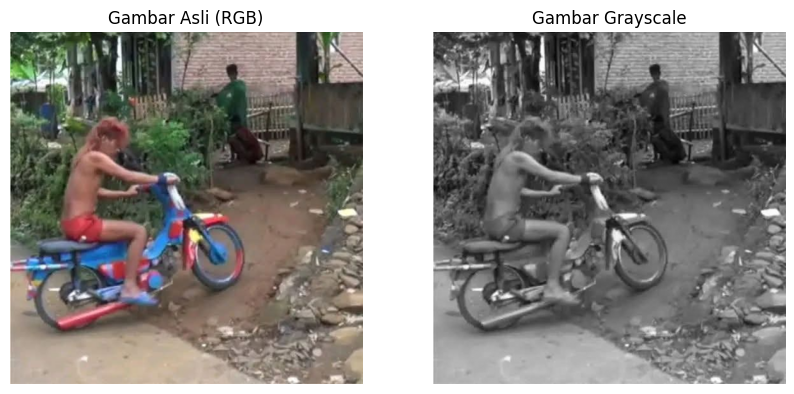

In [11]:
# Buat array baru untuk grayscale
gray_data = np.zeros((pixel_data.shape[0], pixel_data.shape[1]), dtype=np.uint8)

# Konversi ke grayscale tanpa library tambahan
for y in range(pixel_data.shape[0]):  # Loop baris (y)
    for x in range(pixel_data.shape[1]):  # Loop kolom (x)
        r, g, b = pixel_data[y, x]

        # Hitung grayscale dengan rumus standar
        gray = int(0.299 * r + 0.587 * g + 0.114 * b)

        # Simpan ke array grayscale
        gray_data[y, x] = gray

# Tampilkan gambar asli dan grayscale
plt.figure(figsize=(10, 5))

# Gambar asli RGB
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Gambar Asli (RGB)")
plt.axis("off")

# Gambar hasil Grayscale
plt.subplot(1, 2, 2)
plt.imshow(gray_data, cmap="gray")  # cmap "gray" untuk tampilan grayscale
plt.title("Gambar Grayscale")
plt.axis("off")

plt.show()


In [12]:
# Simpan data grayscale ke file TXT
output_gray_file = "pixel_data_grayscale.txt"
with open(output_gray_file, "w") as f:
    for y in range(gray_data.shape[0]):  # Loop baris (y)
        for x in range(gray_data.shape[1]):  # Loop kolom (x)
            gray = gray_data[y, x]
            f.write(f"pixel({x+1},{y+1}) = Gray={gray}\n")

# Baca file dan tampilkan 10 baris pertama dari hasil grayscale
with open(output_gray_file, "r") as f:
    for _ in range(10):  # Tampilkan hanya 10 baris pertama
        print(f.readline().strip())

pixel(1,1) = Gray=211
pixel(2,1) = Gray=119
pixel(3,1) = Gray=146
pixel(4,1) = Gray=133
pixel(5,1) = Gray=137
pixel(6,1) = Gray=155
pixel(7,1) = Gray=154
pixel(8,1) = Gray=140
pixel(9,1) = Gray=139
pixel(10,1) = Gray=142


In [13]:
# Thresholding: ubah grayscale menjadi 0 dan 1 (biner)
threshold = 128  # Ambang batas (bisa diubah)
binary_data = (gray_data > threshold).astype(np.uint8)  # 0 = hitam, 1 = putih

# Simpan data biner ke file TXT
output_binary_file = "pixel_data_binary.txt"
with open(output_binary_file, "w") as f:
    for y in range(binary_data.shape[0]):
        for x in range(binary_data.shape[1]):
            binary = binary_data[y, x]
            f.write(f"pixel({x+1},{y+1}) = Binary={binary}\n")

# Baca file dan tampilkan 10 baris pertama dari hasil biner
with open(output_binary_file, "r") as f:
    for _ in range(10):
        print(f.readline().strip())

pixel(1,1) = Binary=1
pixel(2,1) = Binary=0
pixel(3,1) = Binary=1
pixel(4,1) = Binary=1
pixel(5,1) = Binary=1
pixel(6,1) = Binary=1
pixel(7,1) = Binary=1
pixel(8,1) = Binary=1
pixel(9,1) = Binary=1
pixel(10,1) = Binary=1


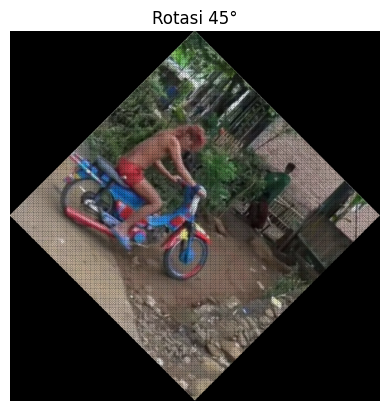

In [16]:
#fungsi rotate image
def rotate_image_manual(img_array, angle):
    h, w, _ = img_array.shape
    angle_rad = np.radians(angle)

    # Matriks rotasi
    cos_theta = np.cos(angle_rad)
    sin_theta = np.sin(angle_rad)

    # Hitung ukuran baru
    new_h = int(abs(h * cos_theta) + abs(w * sin_theta))
    new_w = int(abs(w * cos_theta) + abs(h * sin_theta))

    # Buat array kosong untuk gambar hasil rotasi
    rotated_img = np.zeros((new_h, new_w, 3), dtype=np.uint8)

    # Cari titik tengah gambar lama dan baru
    cx, cy = w // 2, h // 2
    new_cx, new_cy = new_w // 2, new_h // 2

    # Loop melalui setiap pixel gambar asli
    for y in range(h):
        for x in range(w):
            # Transformasi koordinat
            new_x = int((x - cx) * cos_theta - (y - cy) * sin_theta + new_cx)
            new_y = int((x - cx) * sin_theta + (y - cy) * cos_theta + new_cy)

            # Cek apakah dalam batas gambar baru
            if 0 <= new_x < new_w and 0 <= new_y < new_h:
                rotated_img[new_y, new_x] = img_array[y, x]

    return rotated_img

# Rotasi dengan sudut 45 derajat
rotated_45 = rotate_image_manual(pixel_data, 45)

# Tampilkan gambar hasil rotasi manual
plt.imshow(rotated_45)
plt.title("Rotasi 45°")
plt.axis("off")
plt.show()